In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [8]:
class MastermindGame:
    def __init__(self, code_length, max_attempts):
        self.secret_code = [random.choice([0, 1]) for _ in range(code_length)]
        self.max_attempts = max_attempts
        self.attempts = []

    def evaluate_guess(self, guess):
        return sum(1 for i in range(len(self.secret_code)) if self.secret_code[i] == guess[i])

    def play(self):
        attempts = 0
        while attempts < self.max_attempts:
            guess = [random.choice([0, 1]) for _ in range(len(self.secret_code))]
            feedback = self.evaluate_guess(guess)
            self.attempts.append((guess, feedback))
            attempts += 1
            if feedback == len(self.secret_code):
                return True
        return False


Guess: [1, 0, 0, 0], Feedback: 2
Guess: [0, 0, 0, 1], Feedback: 2
Guess: [0, 1, 0, 1], Feedback: 3
Guess: [0, 1, 1, 1], Feedback: 2
Guess: [0, 0, 0, 1], Feedback: 2
Guess: [1, 1, 0, 1], Feedback: 2
Guess: [1, 0, 0, 1], Feedback: 1
Guess: [1, 0, 1, 0], Feedback: 1
Guess: [0, 0, 1, 0], Feedback: 2
Guess: [1, 1, 1, 0], Feedback: 2


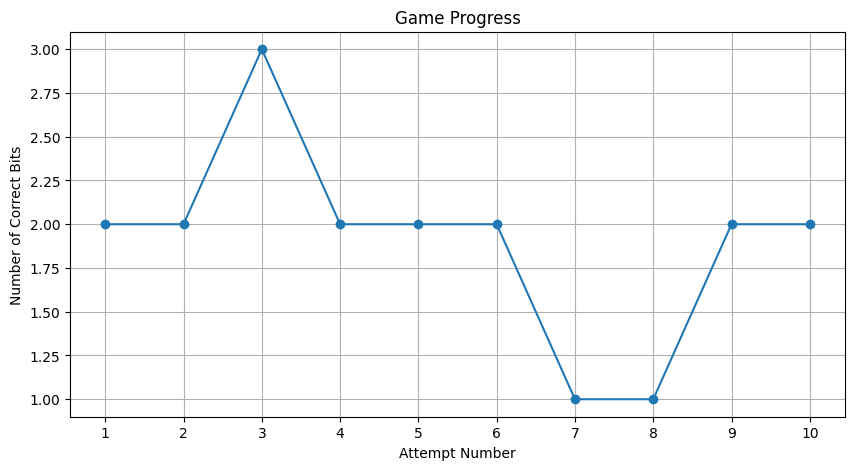

In [9]:
# Create a Mastermind game instance
game = MastermindGame(code_length=4, max_attempts=10)
game.play()

# Print attempts and feedback
for guess, feedback in game.attempts:
    print(f"Guess: {guess}, Feedback: {feedback}")

# Plot game progress
feedbacks = [feedback for _, feedback in game.attempts]
attempts = list(range(1, len(feedbacks) + 1))

plt.figure(figsize=(10, 5))
plt.plot(attempts, feedbacks, marker='o')
plt.xlabel('Attempt Number')
plt.ylabel('Number of Correct Bits')
plt.title('Game Progress')
plt.xticks(np.arange(1, len(feedbacks) + 1, step=1))
plt.grid(True)
plt.show()


**Game State:**
The game state represents the state of the secret code and the current attempt.

$$
|s\rangle = |c_1 c_2 \ldots c_n \rangle |a_1 a_2 \ldots a_n \rangle
$$

- $|c_1 c_2 \ldots c_n \rangle$ represents the qubit string encoding the secret code.
- $|a_1 a_2 \ldots a_n \rangle$ represents the qubit string encoding the current attempt.

**State Vectors:**

1. **Initial State:**
   $$
   |s_0\rangle = |c_1 c_2 \ldots c_n \rangle |0 0 \ldots 0 \rangle
   $$

2. **Guess State:**
   $$
   |s_i\rangle = |c_1 c_2 \ldots c_n \rangle |a_1 a_2 \ldots a_n \rangle
   $$

**Transitioning:**
- When a guess is made, the attempt qubits are updated to reflect the new guess.
- Evaluation of the guess is performed classically.
- The game moves from one guess to the next until either the correct code is guessed or the maximum number of attempts is reached.

**End States:**
- **Winning State:**
  $$
  |s_{\text{win}}\rangle = |c_1 c_2 \ldots c_n \rangle |c_1 c_2 \ldots c_n \rangle
  $$

- **Losing State** (Maximum attempts reached without guessing the correct code):
  $$
  |s_{\text{lose}}\rangle = |c_1 c_2 \ldots c_n \rangle |a_1 a_2 \ldots a_n \rangle
  $$
